# Modelling - Balanced and processed data

## All Topics - Politics, Covid, Gossip and Disaster

In [214]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
import tensorflow as tf

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm
from gensim.models.word2vec import Word2Vec
import pickle
import warnings
warnings.filterwarnings("ignore")

In [216]:
#df = pd.read_csv("/Users/gopalika14/Desktop/combined_tweets.csv")
df = pd.read_csv("/Users/gopalika14/Desktop/tweet_data_modeling.csv")
print(df.shape)
df.head()

(29052, 9)


,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,news_class
0,0,buzzfeed,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,www.addictinginfo.org,fake,woke morning variation headline splashed news ...,proof mainstream medium manipulating election ...,0
1,1,buzzfeed,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,eaglerising.com,fake,president clinton clinton health access initia...,charity clinton foundation distributed watered...,0
2,2,buzzfeed,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,eaglerising.com,fake,collapsing trying step van removed ceremony ne...,hillary clinton administration entirely run fi...,0
3,3,buzzfeed,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",www.addictinginfo.org,fake,donald trump deplorable he suggested building ...,trump latest campaign promise horrible,0
4,4,buzzfeed,Website is Down For Maintenance,Website is Down For Maintenance,www.proudcons.com,fake,website maintenance,website maintenance,0


In [218]:
df['all'] = df['clean_title']+ ''+ df['clean_text']
indexfake = df[ df['target'] == "fake" ].index
indexreal = df[ df['target'] == "real" ].index
# now use df.loc to set values only to those rows
df.loc[indexfake,'is_fake'] = 1
df.loc[indexreal,'is_fake'] = 0
df = df.drop('news_class', axis =1)
df.head()

,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,all,is_fake
0,0,buzzfeed,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,www.addictinginfo.org,fake,woke morning variation headline splashed news ...,proof mainstream medium manipulating election ...,proof mainstream medium manipulating election ...,1.0
1,1,buzzfeed,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,eaglerising.com,fake,president clinton clinton health access initia...,charity clinton foundation distributed watered...,charity clinton foundation distributed watered...,1.0
2,2,buzzfeed,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,eaglerising.com,fake,collapsing trying step van removed ceremony ne...,hillary clinton administration entirely run fi...,hillary clinton administration entirely run fi...,1.0
3,3,buzzfeed,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",www.addictinginfo.org,fake,donald trump deplorable he suggested building ...,trump latest campaign promise horrible,trump latest campaign promise horribledonald t...,1.0
4,4,buzzfeed,Website is Down For Maintenance,Website is Down For Maintenance,www.proudcons.com,fake,website maintenance,website maintenance,website maintenancewebsite maintenance,1.0


In [219]:
#import nltk
#nltk.download('stopwords')
#stop = stopwords.words('english')
#sw_list = ['say','said','though','asked','time','including','made','including','time','number','one','called','added','according','made','put'] #adding more stop words in the list to refine the word cloud
#stop.extend(sw_list)
#punctuation = list(string.punctuation)
#stop.extend(punctuation)

In [220]:
#def strip_html(text):
 #   soup = BeautifulSoup(text, "html.parser")
  #  return soup.get_text()


#def remove_between_square_brackets(text):
 #   return re.sub('\[[^]]*\]', '', text)

#def remove_between_square_brackets(text):
 #   return re.sub(r'http\S+', '', text)

#def remove_stopwords(text):
 #   final_text = []
  #  for i in text.split():
   #     if i.strip().lower() not in stop:
    #        final_text.append(i.strip())
    #return " ".join(final_text)

#def denoise_text(text):
 #   text = strip_html(text)
  #  text = remove_between_square_brackets(text)
   # text = remove_stopwords(text)
    #return text


In [228]:
df['all']=df['all'].astype('string')
df = df.replace(np.nan, '', regex=True)
df['all'].dtype

StringDtype

In [229]:
#Apply function on full-text column
#df['all']=df['all'].apply(denoise_text)
#df.head()

#### Balancing data

Random under-sampling:
1.0    10304
0.0    10304
Name: is_fake, dtype: int64
(20608, 10)


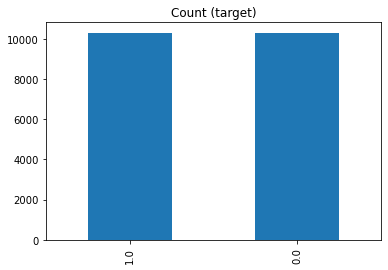

In [230]:
# Class count
count_class_real, count_class_fake = df.is_fake.value_counts()

# Divide by class
df_class_real = df[df['is_fake'] == 0.0]
df_class_fake = df[df['is_fake'] == 1.0]


df_class_real_under = df_class_real.sample(count_class_fake)
df_new = pd.concat([df_class_real_under, df_class_fake], axis=0)

print('Random under-sampling:')
print(df_new.is_fake.value_counts())

df_new.is_fake.value_counts().plot(kind='bar', title='Count (target)');

df_new.head()
print(df_new.shape)

In [231]:
X=df_new['all']
y=df_new['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [232]:
#Random Forest Classifier
pp1=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
    ])

In [233]:
pp1.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [234]:
predictions=pp1.predict(X_test)

In [235]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[1621  451]
 [ 587 1463]]


              precision    recall  f1-score   support

         0.0       0.73      0.78      0.76      2072
         1.0       0.76      0.71      0.74      2050

    accuracy                           0.75      4122
   macro avg       0.75      0.75      0.75      4122
weighted avg       0.75      0.75      0.75      4122



In [236]:
#passive-aggresive classifier
from sklearn.linear_model import PassiveAggressiveClassifier
pp2=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [237]:
pp2.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', PassiveAggressiveClassifier())])

In [238]:
predictions2=pp2.predict(X_test)

In [239]:
print(confusion_matrix(y_test, predictions2))
print('\n')
print(classification_report(y_test, predictions2))

[[1809  263]
 [1257  793]]


              precision    recall  f1-score   support

         0.0       0.59      0.87      0.70      2072
         1.0       0.75      0.39      0.51      2050

    accuracy                           0.63      4122
   macro avg       0.67      0.63      0.61      4122
weighted avg       0.67      0.63      0.61      4122



In [240]:
#logistic regression
pp3=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
    ])

In [241]:
pp3.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [242]:
predictions3=pp3.predict(X_test)

In [243]:
print(confusion_matrix(y_test, predictions3))
print('\n')
print(classification_report(y_test, predictions3))

[[1493  579]
 [ 349 1701]]


              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      2072
         1.0       0.75      0.83      0.79      2050

    accuracy                           0.77      4122
   macro avg       0.78      0.78      0.77      4122
weighted avg       0.78      0.77      0.77      4122



In [244]:
from xgboost import XGBClassifier
#XGBoost
pp4=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier())
    ])

In [245]:
pp4.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [246]:
predictions4=pp4.predict(X_test)

In [247]:
print(confusion_matrix(y_test, predictions4))
print('\n')
print(classification_report(y_test, predictions4))

[[1463  609]
 [ 375 1675]]


              precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      2072
         1.0       0.73      0.82      0.77      2050

    accuracy                           0.76      4122
   macro avg       0.76      0.76      0.76      4122
weighted avg       0.76      0.76      0.76      4122



### Splitting Data

In [248]:
# Split data for topic specific modelling
polit = df_new[df_new['id'].str.contains('polit')]
print(polit.shape)

gossip = df_new[df_new['id'].str.contains('gossip')]
print(gossip.shape)

covid = df_new[df_new['id'].str.contains('covid')]
print(covid.shape)

natural = df_new[df_new['id'].str.contains('natural')]
print(natural.shape)

(706, 10)
(12766, 10)
(885, 10)
(6106, 10)


# Politics

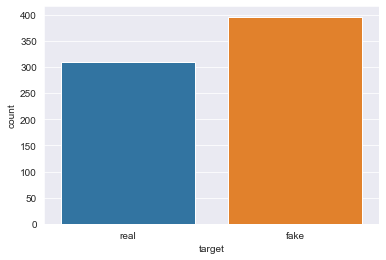

In [251]:
sns.set_style("darkgrid")
sns.countplot(polit.target)

Random under-sampling:
1.0    396
0.0    310
Name: is_fake, dtype: int64
(706, 10)


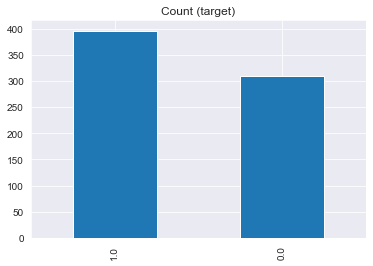

In [252]:
# Class count
count_class_real, count_class_fake = polit.is_fake.value_counts()

# Divide by class
df_class_real = polit[polit['is_fake'] == 0.0]
df_class_fake = polit[polit['is_fake'] == 1.0]


df_class_real_under = df_class_real.sample(count_class_fake)
polit = pd.concat([df_class_real_under, df_class_fake], axis=0)

print('Random under-sampling:')
print(polit.is_fake.value_counts())

polit.is_fake.value_counts().plot(kind='bar', title='Count (target)');

polit.head()
print(polit.shape)

In [180]:
X=polit['all']
y=polit['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
RandomForestClassifier().get_params()

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

In [87]:
rfc=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())])

In [88]:
# Poltics
rfc.fit(X_train,y_train)
predictions_rfc=rfc.predict(X_test)

In [89]:
print(confusion_matrix(y_test, predictions_rfc))
print('\n')
print(classification_report(y_test, predictions_rfc))

[[50 15]
 [ 8 66]]


              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81        65
         1.0       0.81      0.89      0.85        74

    accuracy                           0.83       139
   macro avg       0.84      0.83      0.83       139
weighted avg       0.84      0.83      0.83       139



In [90]:
LogisticRegression().get_params()

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

In [91]:
lr=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())])

In [93]:
# Poltics
lr.fit(X_train,y_train)
predictions_lr=lr.predict(X_test)

In [94]:
print(confusion_matrix(y_test, predictions_lr))
print('\n')
print(classification_report(y_test, predictions_lr))

[[27 38]
 [ 1 73]]


              precision    recall  f1-score   support

         0.0       0.96      0.42      0.58        65
         1.0       0.66      0.99      0.79        74

    accuracy                           0.72       139
   macro avg       0.81      0.70      0.68       139
weighted avg       0.80      0.72      0.69       139



In [96]:
pac=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())
    ])

In [97]:
# Poltics
pac.fit(X_train,y_train)
predictions_pac=pac.predict(X_test)

In [98]:
print(confusion_matrix(y_test, predictions_pac))
print('\n')
print(classification_report(y_test, predictions_pac))

[[34 31]
 [ 4 70]]


              precision    recall  f1-score   support

         0.0       0.89      0.52      0.66        65
         1.0       0.69      0.95      0.80        74

    accuracy                           0.75       139
   macro avg       0.79      0.73      0.73       139
weighted avg       0.79      0.75      0.73       139



In [99]:
xgb=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier())
    ])

In [100]:
# Poltics
xgb.fit(X_train,y_train)
predictions_xgb=xgb.predict(X_test)

In [101]:
print(confusion_matrix(y_test, predictions_xgb))
print('\n')
print(classification_report(y_test, predictions_xgb))

[[53 12]
 [12 62]]


              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        65
         1.0       0.84      0.84      0.84        74

    accuracy                           0.83       139
   macro avg       0.83      0.83      0.83       139
weighted avg       0.83      0.83      0.83       139



# With Cross-validation

In [296]:
# Pipeline & Gridsearch setup

# TFIDF pipeline setup
tvc_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('mb', MultinomialNB())])

# Setting params for TFIDF Vectorizer gridsearch
tf_params = {
 'tvec__max_features':[100, 2000],
 'tvec__ngram_range': [(1, 1), (1, 2), (2, 2)],
 'tvec__stop_words': [None, 'english']}

#Model Pipelines
# LogisticRegression pipeline setup
lr_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('lr', LogisticRegression())])
# Randomforest pipeline setup
rf_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('rf', RandomForestClassifier())])

# PassiveAggresiveClassifier pipeline setup
pac_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('pac', PassiveAggressiveClassifier())])

# XGBClassifier pipeline setup
xgb_pipe = Pipeline([
 ('tvec', TfidfVectorizer()),
 ('xgb', XGBClassifier())])

#Model Parameters
# Setting up randomforest params
rf_params = {
 'tvec__max_features':[2000],
 'tvec__ngram_range': [(1, 2)],
 'tvec__stop_words': ['english'],
 'rf__max_depth': [1000],
 'rf__min_samples_split': [100],
 'rf__max_leaf_nodes': [None]}


lr_params = {
    'tvec__max_features':[2000],
    'tvec__ngram_range': [(1, 2)],
    'tvec__stop_words': ['english'],
    'lr__penalty': ['l1', 'l2'],
    'lr__C':[0.001,.009,0.01,.09,1,5,10,25]}

pac_params = {
    'tvec__max_features':[2000],
    'tvec__ngram_range': [(1, 2)],
    'tvec__stop_words': ['english'],
    'pac__C' : [0.003, 0.01, 0.03, 0.1], 
    'pac__loss': ['hinge', 'squared_hinge']}

xgb_params = {
    'tvec__max_features':[2000],
    'tvec__ngram_range': [(1, 2)],
    'tvec__stop_words': ['english']}


In [201]:
# Fit
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 3, verbose =1, n_jobs = -1)
# Setting up GridSearch for Randomforest, Logisticegression,XGBoost Classifier and PassiveAgressiveClassifier
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 3, verbose = 1, n_jobs = -1)
lr_gs =GridSearchCV(lr_pipe, param_grid=lr_params, cv = 3, verbose = 1, n_jobs = -1)
xgb_gs =GridSearchCV(xgb_pipe, param_grid=xgb_params, cv = 3, verbose = 1, n_jobs = -1)
pac_gs = GridSearchCV(pac_pipe, param_grid=pac_params, cv = 3, verbose = 1, n_jobs = -1)

# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)
lr_gs.fit(X_train, y_train)
xgb_gs.fit(X_train, y_train)
pac_gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   11.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   15.4s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.4s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    8.8s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('pac', PassiveAggressiveClassifier())]),
             n_jobs=-1,
             param_grid={'pac__C': [0.003, 0.01, 0.03, 0.1],
                         'pac__loss': ['hinge', 'squared_hinge'],
                         'tvec__max_features': [2000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [202]:
predictions_rfc_cv=rf_gs.predict(X_test)
predictions_lr_cv=lr_gs.predict(X_test)
predictions_xgb_cv=xgb_gs.predict(X_test)
predictions_pac_cv=pac_gs.predict(X_test)



In [206]:
print(confusion_matrix(y_test, predictions_rfc_cv))
print('\n')
print(classification_report(y_test, predictions_rfc_cv))

print(confusion_matrix(y_test, predictions_lr_cv))
print('\n')
print(classification_report(y_test, predictions_lr_cv))

print(confusion_matrix(y_test, predictions_xgb_cv))
print('\n')
print(classification_report(y_test, predictions_xgb_cv))

print(confusion_matrix(y_test, predictions_pac_cv))
print('\n')
print(classification_report(y_test, predictions_pac_cv))

[[53 15]
 [11 61]]


              precision    recall  f1-score   support

         0.0       0.83      0.78      0.80        68
         1.0       0.80      0.85      0.82        72

    accuracy                           0.81       140
   macro avg       0.82      0.81      0.81       140
weighted avg       0.82      0.81      0.81       140

[[59  9]
 [11 61]]


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86        68
         1.0       0.87      0.85      0.86        72

    accuracy                           0.86       140
   macro avg       0.86      0.86      0.86       140
weighted avg       0.86      0.86      0.86       140

[[53 15]
 [13 59]]


              precision    recall  f1-score   support

         0.0       0.80      0.78      0.79        68
         1.0       0.80      0.82      0.81        72

    accuracy                           0.80       140
   macro avg       0.80      0.80      0.80       140
weighted av

In [205]:
# Scoring Training data on TFIDFVectorizer
print('TFID score on train:' ,tvc_gs.score(X_train, y_train))

# Scoring Test data on TFIDFVectorizer
print('TFID score on test:' ,tvc_gs.score(X_test, y_test))

# Scoring Training data on all models
print('RF score on train:' ,rf_gs.score(X_train, y_train))
print('LR score on train:' ,lr_gs.score(X_train, y_train))
print('XGB score on train:' ,xgb_gs.score(X_train, y_train))
print('PassiveAC score on train:' ,pac_gs.score(X_train, y_train))
# Checking Test score on all models
print('RF score on test:' ,rf_gs.score(X_test, y_test))
print('LR score on test:' ,lr_gs.score(X_test, y_test))
print('XGB score on test:' ,xgb_gs.score(X_test, y_test))
print('PassiveAC score on test:' ,pac_gs.score(X_test, y_test))

TFID score on train: 0.8850987432675045
TFID score on test: 0.7785714285714286
RF score on train: 0.933572710951526
LR score on train: 0.9658886894075404
XGB score on train: 0.9622980251346499
PassiveAC score on train: 0.9622980251346499
RF score on test: 0.8142857142857143
LR score on test: 0.8571428571428571
XGB score on test: 0.8
PassiveAC score on test: 0.85


# Gossip - No CV as the data is huge

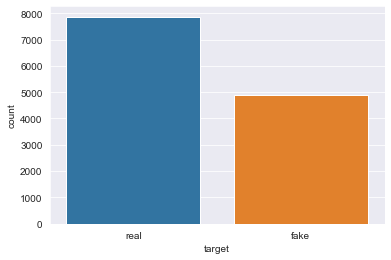

In [253]:
sns.set_style("darkgrid")
sns.countplot(gossip.target)

Random under-sampling:
1.0    4900
0.0    4900
Name: is_fake, dtype: int64
(9800, 10)


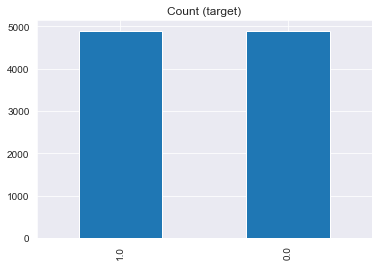

In [255]:
# Class count
count_class_real, count_class_fake = gossip.is_fake.value_counts()

# Divide by class
df_class_real = gossip[gossip['is_fake'] == 0.0]
df_class_fake = gossip[gossip['is_fake'] == 1.0]


df_class_real_under = df_class_real.sample(count_class_fake)
gossip = pd.concat([df_class_real_under, df_class_fake], axis=0)

print('Random under-sampling:')
print(gossip.is_fake.value_counts())

gossip.is_fake.value_counts().plot(kind='bar', title='Count (target)');

gossip.head()
print(gossip.shape)

In [256]:
X=gossip['all']
y=gossip['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [257]:
rfc2=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())])

In [258]:
rfc2.fit(X_train,y_train)
predictions_rfc2=rfc2.predict(X_test)

In [259]:
print(confusion_matrix(y_test, predictions_rfc2))
print('\n')
print(classification_report(y_test, predictions_rfc2))

[[823 168]
 [239 730]]


              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       991
         1.0       0.81      0.75      0.78       969

    accuracy                           0.79      1960
   macro avg       0.79      0.79      0.79      1960
weighted avg       0.79      0.79      0.79      1960



In [260]:
lr2=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())])

In [261]:
lr2.fit(X_train,y_train)
predictions_lr2=lr2.predict(X_test)

In [262]:
print(confusion_matrix(y_test, predictions_lr2))
print('\n')
print(classification_report(y_test, predictions_lr2))

[[855 136]
 [254 715]]


              precision    recall  f1-score   support

         0.0       0.77      0.86      0.81       991
         1.0       0.84      0.74      0.79       969

    accuracy                           0.80      1960
   macro avg       0.81      0.80      0.80      1960
weighted avg       0.81      0.80      0.80      1960



In [263]:
pac2=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())])

In [264]:
pac2.fit(X_train,y_train)
predictions_pac2=pac2.predict(X_test)

In [265]:
print(confusion_matrix(y_test, predictions_pac2))
print('\n')
print(classification_report(y_test, predictions_pac2))

[[769 222]
 [228 741]]


              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77       991
         1.0       0.77      0.76      0.77       969

    accuracy                           0.77      1960
   macro avg       0.77      0.77      0.77      1960
weighted avg       0.77      0.77      0.77      1960



In [266]:
xgb2=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier())])

In [267]:
xgb2.fit(X_train,y_train)
predictions_xgb2=xgb2.predict(X_test)

In [268]:
print(confusion_matrix(y_test, predictions_xgb2))
print('\n')
print(classification_report(y_test, predictions_xgb2))

[[816 175]
 [281 688]]


              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78       991
         1.0       0.80      0.71      0.75       969

    accuracy                           0.77      1960
   macro avg       0.77      0.77      0.77      1960
weighted avg       0.77      0.77      0.77      1960



# Covid

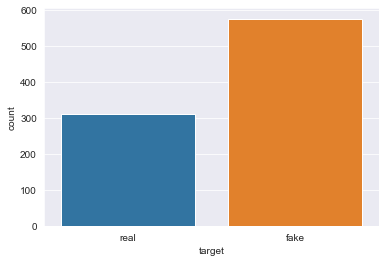

In [254]:
sns.set_style("darkgrid")
sns.countplot(covid.target)

Random under-sampling:
1.0    575
0.0    310
Name: is_fake, dtype: int64
(885, 10)


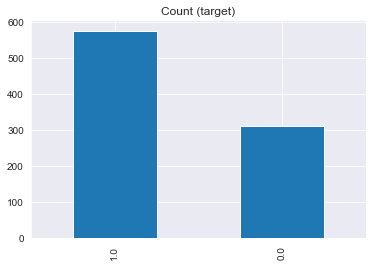

In [269]:
# Class count
count_class_real, count_class_fake = covid.is_fake.value_counts()

# Divide by class
df_class_real = covid[covid['is_fake'] == 0.0]
df_class_fake = covid[covid['is_fake'] == 1.0]


df_class_real_under = df_class_real.sample(count_class_fake)
covid = pd.concat([df_class_real_under, df_class_fake], axis=0)

print('Random under-sampling:')
print(covid.is_fake.value_counts())

covid.is_fake.value_counts().plot(kind='bar', title='Count (target)');

covid.head()
print(covid.shape)

In [207]:
X=covid['all']
y=covid['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
rfc3=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())])

In [121]:
rfc3.fit(X_train,y_train)
predictions_rfc3=rfc3.predict(X_test)

In [122]:
print(confusion_matrix(y_test, predictions_rfc3))
print('\n')
print(classification_report(y_test, predictions_rfc3))

[[ 51  17]
 [  4 107]]


              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83        68
         1.0       0.86      0.96      0.91       111

    accuracy                           0.88       179
   macro avg       0.90      0.86      0.87       179
weighted avg       0.89      0.88      0.88       179



In [123]:
lr3=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())])

In [124]:
lr3.fit(X_train,y_train)
predictions_lr3=lr3.predict(X_test)

In [125]:
print(confusion_matrix(y_test, predictions_lr3))
print('\n')
print(classification_report(y_test, predictions_lr3))

[[ 39  29]
 [  2 109]]


              precision    recall  f1-score   support

         0.0       0.95      0.57      0.72        68
         1.0       0.79      0.98      0.88       111

    accuracy                           0.83       179
   macro avg       0.87      0.78      0.80       179
weighted avg       0.85      0.83      0.81       179



In [127]:
pac3=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())])

In [128]:
pac3.fit(X_train,y_train)
predictions_pac3=pac3.predict(X_test)

In [129]:
print(confusion_matrix(y_test, predictions_pac3))
print('\n')
print(classification_report(y_test, predictions_pac3))

[[ 55  13]
 [  7 104]]


              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85        68
         1.0       0.89      0.94      0.91       111

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179



In [130]:
xgb3=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier())])

In [131]:
xgb3.fit(X_train,y_train)
predictions_xgb3=xgb3.predict(X_test)

In [132]:
print(confusion_matrix(y_test, predictions_xgb3))
print('\n')
print(classification_report(y_test, predictions_xgb3))

[[ 51  17]
 [ 11 100]]


              precision    recall  f1-score   support

         0.0       0.82      0.75      0.78        68
         1.0       0.85      0.90      0.88       111

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



# With cross-validation

In [208]:
# Fit
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 3, verbose =1, n_jobs = -1)
# Setting up GridSearch for Randomforest, Logisticegression,XGBoost Classifier and PassiveAgressiveClassifier
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 3, verbose = 1, n_jobs = -1)
lr_gs =GridSearchCV(lr_pipe, param_grid=lr_params, cv = 3, verbose = 1, n_jobs = -1)
xgb_gs =GridSearchCV(xgb_pipe, param_grid=xgb_params, cv = 3, verbose = 1, n_jobs = -1)
pac_gs = GridSearchCV(pac_pipe, param_grid=pac_params, cv = 3, verbose = 1, n_jobs = -1)

# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)
lr_gs.fit(X_train, y_train)
xgb_gs.fit(X_train, y_train)
pac_gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   11.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.8s finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:   13.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.7s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.9s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('pac', PassiveAggressiveClassifier())]),
             n_jobs=-1,
             param_grid={'pac__C': [0.003, 0.01, 0.03, 0.1],
                         'pac__loss': ['hinge', 'squared_hinge'],
                         'tvec__max_features': [2000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [209]:
predictions_rfc_cv=rf_gs.predict(X_test)
predictions_lr_cv=lr_gs.predict(X_test)
predictions_xgb_cv=xgb_gs.predict(X_test)
predictions_pac_cv=pac_gs.predict(X_test)



In [210]:
print(confusion_matrix(y_test, predictions_rfc_cv))
print('\n')
print(classification_report(y_test, predictions_rfc_cv))

print(confusion_matrix(y_test, predictions_lr_cv))
print('\n')
print(classification_report(y_test, predictions_lr_cv))

print(confusion_matrix(y_test, predictions_xgb_cv))
print('\n')
print(classification_report(y_test, predictions_xgb_cv))

print(confusion_matrix(y_test, predictions_pac_cv))
print('\n')
print(classification_report(y_test, predictions_pac_cv))

[[ 55  14]
 [  4 107]]


              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86        69
         1.0       0.88      0.96      0.92       111

    accuracy                           0.90       180
   macro avg       0.91      0.88      0.89       180
weighted avg       0.90      0.90      0.90       180

[[ 60   9]
 [  5 106]]


              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90        69
         1.0       0.92      0.95      0.94       111

    accuracy                           0.92       180
   macro avg       0.92      0.91      0.92       180
weighted avg       0.92      0.92      0.92       180

[[ 56  13]
 [  9 102]]


              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84        69
         1.0       0.89      0.92      0.90       111

    accuracy                           0.88       180
   macro avg       0.87      0.87      0.87       180

In [211]:
# Scoring Training data on TFIDFVectorizer
print('TFID score on train:' ,tvc_gs.score(X_train, y_train))

# Scoring Test data on TFIDFVectorizer
print('TFID score on test:' ,tvc_gs.score(X_test, y_test))

# Scoring Training data on all models
print('RF score on train:' ,rf_gs.score(X_train, y_train))
print('LR score on train:' ,lr_gs.score(X_train, y_train))
print('XGB score on train:' ,xgb_gs.score(X_train, y_train))
print('PassiveAC score on train:' ,pac_gs.score(X_train, y_train))
# Checking Test score on all models
print('RF score on test:' ,rf_gs.score(X_test, y_test))
print('LR score on test:' ,lr_gs.score(X_test, y_test))
print('XGB score on test:' ,xgb_gs.score(X_test, y_test))
print('PassiveAC score on test:' ,pac_gs.score(X_test, y_test))

TFID score on train: 0.9316596931659693
TFID score on test: 0.9166666666666666
RF score on train: 0.9860529986052998
LR score on train: 0.99860529986053
XGB score on train: 0.99860529986053
PassiveAC score on train: 0.99860529986053
RF score on test: 0.9
LR score on test: 0.9222222222222223
XGB score on test: 0.8777777777777778
PassiveAC score on test: 0.9277777777777778


# Disaster 

In [277]:
df = pd.read_csv("/Users/gopalika14/Desktop/tweet_data_modeling.csv")
natural = df[df['id'].str.contains('natural')]
print(natural.shape)
natural.head()

(7613, 9)


,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,news_class
1341,1341,natural_disaster,NaN,Our Deeds are the Reason of this #earthquake M...,NaN,real,deed reason earthquake allah forgive,NaN,1
1342,1342,natural_disaster,NaN,Forest fire near La Ronge Sask. Canada,NaN,real,forest near la ronge sask canada,NaN,1
1343,1343,natural_disaster,NaN,All residents asked to 'shelter in place' are ...,NaN,real,resident asked shelter place notified officer ...,NaN,1
1344,1344,natural_disaster,NaN,"13,000 people receive #wildfires evacuation or...",NaN,real,people receive wildfire evacuation order calif...,NaN,1
1345,1345,natural_disaster,NaN,Just got sent this photo from Ruby #Alaska as ...,NaN,real,got sent photo ruby alaska smoke wildfire pour...,NaN,1


In [278]:
indexfake = natural[ natural['target'] == "fake" ].index
indexreal = natural[ natural['target'] == "real" ].index
# now use df.loc to set values only to those rows
natural.loc[indexfake,'is_fake'] = 1
natural.loc[indexreal,'is_fake'] = 0
natural = natural.drop('news_class', axis =1)
natural.head()

,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,is_fake
1341,1341,natural_disaster,NaN,Our Deeds are the Reason of this #earthquake M...,NaN,real,deed reason earthquake allah forgive,NaN,0.0
1342,1342,natural_disaster,NaN,Forest fire near La Ronge Sask. Canada,NaN,real,forest near la ronge sask canada,NaN,0.0
1343,1343,natural_disaster,NaN,All residents asked to 'shelter in place' are ...,NaN,real,resident asked shelter place notified officer ...,NaN,0.0
1344,1344,natural_disaster,NaN,"13,000 people receive #wildfires evacuation or...",NaN,real,people receive wildfire evacuation order calif...,NaN,0.0
1345,1345,natural_disaster,NaN,Just got sent this photo from Ruby #Alaska as ...,NaN,real,got sent photo ruby alaska smoke wildfire pour...,NaN,0.0


In [280]:
natural['clean_text']=natural['clean_text'].astype('string')
natural = natural.replace(np.nan, '', regex=True)
print(natural['clean_text'].dtype)
natural.head()

string


,Unnamed: 0,id,title,text,source,target,clean_text,clean_title,is_fake
1341,1341,natural_disaster,,Our Deeds are the Reason of this #earthquake M...,,real,deed reason earthquake allah forgive,,0.0
1342,1342,natural_disaster,,Forest fire near La Ronge Sask. Canada,,real,forest near la ronge sask canada,,0.0
1343,1343,natural_disaster,,All residents asked to 'shelter in place' are ...,,real,resident asked shelter place notified officer ...,,0.0
1344,1344,natural_disaster,,"13,000 people receive #wildfires evacuation or...",,real,people receive wildfire evacuation order calif...,,0.0
1345,1345,natural_disaster,,Just got sent this photo from Ruby #Alaska as ...,,real,got sent photo ruby alaska smoke wildfire pour...,,0.0


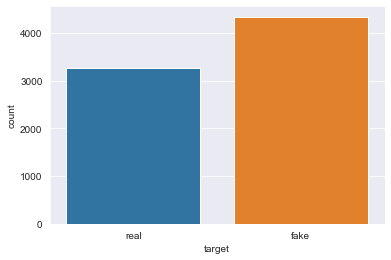

In [281]:
sns.set_style("darkgrid")
sns.countplot(natural.target)

Random under-sampling:
1.0    4342
0.0    3271
Name: is_fake, dtype: int64
(7613, 9)


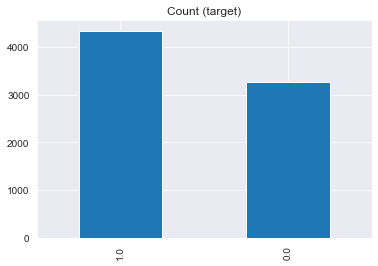

In [282]:
# Class count
count_class_real, count_class_fake = natural.is_fake.value_counts()

# Divide by class
df_class_real = natural[natural['is_fake'] == 0.0]
df_class_fake = natural[natural['is_fake'] == 1.0]


df_class_real_under = df_class_real.sample(count_class_fake)
natural = pd.concat([df_class_real_under, df_class_fake], axis=0)

print('Random under-sampling:')
print(natural.is_fake.value_counts())

natural.is_fake.value_counts().plot(kind='bar', title='Count (target)');

natural.head()
print(natural.shape)

In [283]:
X=natural['clean_text']
y=natural['is_fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [284]:
rfc4=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())])

In [285]:
rfc4.fit(X_train,y_train)
predictions_rfc4=rfc4.predict(X_test)

In [286]:
print(confusion_matrix(y_test, predictions_rfc4))
print('\n')
print(classification_report(y_test, predictions_rfc4))

[[442 247]
 [ 90 744]]


              precision    recall  f1-score   support

         0.0       0.83      0.64      0.72       689
         1.0       0.75      0.89      0.82       834

    accuracy                           0.78      1523
   macro avg       0.79      0.77      0.77      1523
weighted avg       0.79      0.78      0.77      1523



In [287]:
lr4=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier())])

In [288]:
lr4.fit(X_train,y_train)
predictions_lr4=lr4.predict(X_test)

In [289]:
print(confusion_matrix(y_test, predictions_lr4))
print('\n')
print(classification_report(y_test, predictions_lr4))

[[393 296]
 [ 76 758]]


              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       689
         1.0       0.72      0.91      0.80       834

    accuracy                           0.76      1523
   macro avg       0.78      0.74      0.74      1523
weighted avg       0.77      0.76      0.75      1523



In [290]:
pac4=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',PassiveAggressiveClassifier())])

In [291]:
pac4.fit(X_train,y_train)
predictions_pac4=pac4.predict(X_test)

In [292]:
print(confusion_matrix(y_test, predictions_pac4))
print('\n')
print(classification_report(y_test, predictions_pac4))

[[452 237]
 [151 683]]


              precision    recall  f1-score   support

         0.0       0.75      0.66      0.70       689
         1.0       0.74      0.82      0.78       834

    accuracy                           0.75      1523
   macro avg       0.75      0.74      0.74      1523
weighted avg       0.75      0.75      0.74      1523



In [293]:
xgb4=Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',XGBClassifier())])

In [294]:
xgb4.fit(X_train,y_train)
predictions_xgb4=xgb4.predict(X_test)

In [295]:
print(confusion_matrix(y_test, predictions_xgb4))
print('\n')
print(classification_report(y_test, predictions_xgb4))

[[393 296]
 [ 76 758]]


              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       689
         1.0       0.72      0.91      0.80       834

    accuracy                           0.76      1523
   macro avg       0.78      0.74      0.74      1523
weighted avg       0.77      0.76      0.75      1523



# Cross Validation with Grid Search

In [297]:
# Fit
# Setting up GridSearch for TFIDFVectorizer
tvc_gs = GridSearchCV(tvc_pipe, param_grid=tf_params, cv = 3, verbose =1, n_jobs = -1)
# Setting up GridSearch for Randomforest, Logisticegression,XGBoost Classifier and PassiveAgressiveClassifier
rf_gs = GridSearchCV(rf_pipe, param_grid=rf_params, cv = 3, verbose = 1, n_jobs = -1)
lr_gs =GridSearchCV(lr_pipe, param_grid=lr_params, cv = 3, verbose = 1, n_jobs = -1)
xgb_gs =GridSearchCV(xgb_pipe, param_grid=xgb_params, cv = 3, verbose = 1, n_jobs = -1)
pac_gs = GridSearchCV(pac_pipe, param_grid=pac_params, cv = 3, verbose = 1, n_jobs = -1)

# Fitting TVC GS
tvc_gs.fit(X_train, y_train)
# Fitting Randomforest CV GS
rf_gs.fit(X_train, y_train)
lr_gs.fit(X_train, y_train)
xgb_gs.fit(X_train, y_train)
pac_gs.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   11.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.9s finished


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s finished


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    3.0s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('pac', PassiveAggressiveClassifier())]),
             n_jobs=-1,
             param_grid={'pac__C': [0.003, 0.01, 0.03, 0.1],
                         'pac__loss': ['hinge', 'squared_hinge'],
                         'tvec__max_features': [2000],
                         'tvec__ngram_range': [(1, 2)],
                         'tvec__stop_words': ['english']},
             verbose=1)

In [298]:
predictions_rfc_cv=rf_gs.predict(X_test)
predictions_lr_cv=lr_gs.predict(X_test)
predictions_xgb_cv=xgb_gs.predict(X_test)
predictions_pac_cv=pac_gs.predict(X_test)


In [299]:
print(confusion_matrix(y_test, predictions_rfc_cv))
print('\n')
print(classification_report(y_test, predictions_rfc_cv))

print(confusion_matrix(y_test, predictions_lr_cv))
print('\n')
print(classification_report(y_test, predictions_lr_cv))

print(confusion_matrix(y_test, predictions_xgb_cv))
print('\n')
print(classification_report(y_test, predictions_xgb_cv))

print(confusion_matrix(y_test, predictions_pac_cv))
print('\n')
print(classification_report(y_test, predictions_pac_cv))

[[480 209]
 [124 710]]


              precision    recall  f1-score   support

         0.0       0.79      0.70      0.74       689
         1.0       0.77      0.85      0.81       834

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.78      0.78      0.78      1523

[[454 235]
 [ 77 757]]


              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74       689
         1.0       0.76      0.91      0.83       834

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523

[[392 297]
 [ 74 760]]


              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68       689
         1.0       0.72      0.91      0.80       834

    accuracy                           0.76      1523
   macro avg       0.78      0.74      0.74      1523

In [300]:
# Scoring Training data on TFIDFVectorizer
print('TFID score on train:' ,tvc_gs.score(X_train, y_train))

# Scoring Test data on TFIDFVectorizer
print('TFID score on test:' ,tvc_gs.score(X_test, y_test))

# Scoring Training data on all models
print('RF score on train:' ,rf_gs.score(X_train, y_train))
print('LR score on train:' ,lr_gs.score(X_train, y_train))
print('XGB score on train:' ,xgb_gs.score(X_train, y_train))
print('PassiveAC score on train:' ,pac_gs.score(X_train, y_train))
# Checking Test score on all models
print('RF score on test:' ,rf_gs.score(X_test, y_test))
print('LR score on test:' ,lr_gs.score(X_test, y_test))
print('XGB score on test:' ,xgb_gs.score(X_test, y_test))
print('PassiveAC score on test:' ,pac_gs.score(X_test, y_test))

TFID score on train: 0.8453201970443349
TFID score on test: 0.7852921864740644
RF score on train: 0.9108374384236453
LR score on train: 0.8533661740558293
XGB score on train: 0.8571428571428571
PassiveAC score on train: 0.8397372742200329
RF score on test: 0.7813525935653316
LR score on test: 0.7951411687458962
XGB score on test: 0.7564018384766907
PassiveAC score on test: 0.7892317793827971
